In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import h5py
import pickle
import astropy.units as u
import astropy.constants as c
import numpy as np

import py21cmfast as p21c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)

sys.path.append(os.environ['DH_DIR'])

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
from dm21cm.injections.pbh import PBHInjection
from dm21cm.utils import load_h5_dict
from astropy.cosmology import Planck18 as cosmo

In [3]:
inj = PBHInjection(m_PBH=10**14.5, f_PBH=1e-10)
abscs = load_h5_dict(os.environ['DM21CM_DATA_DIR'] + '/abscissas.h5')
inj.set_binning(abscs)

In [21]:
inj.t_arr[-1]

2.51738e+16

In [24]:
import h5py

In [27]:
with h5py.File(os.environ['DM21CM_DIR'] + '/data/pbh/pbh_logm15.000.h5', 'r') as hf:
    print(hf['phot dNdEdt'].shape)

(17, 500)


In [20]:
from scipy import optimize

In [21]:
optimize.newton(lambda x: cosmo.age(x).to(u.s).value - inj.t_arr[-1], 6)

6.7498945317680645

In [19]:
cosmo.age(6.748).to(u.s).value

2.5183036808722484e+16

In [33]:
s = inj.inj_phot_spec(6)
np.any(s.dNdE)

False

(1e-50, 1.8888255183055576e-20)

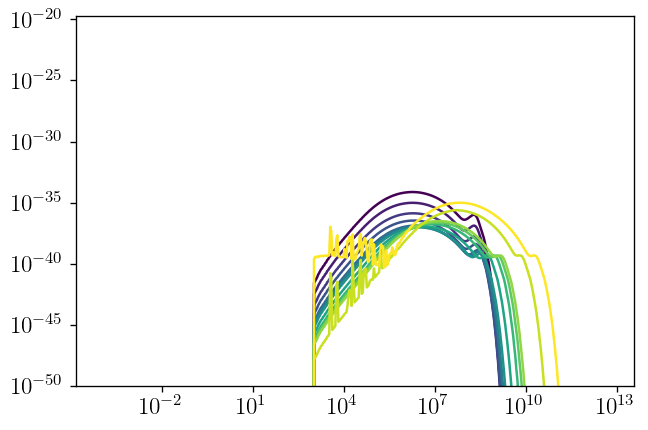

In [23]:
z_s = [100, 50, 25, 15, 10, 9, 8, 7, 6.8, 6.77, 6.76, 6.75, 6.749895]
for i, z in enumerate(z_s):
    s = inj.inj_phot_spec(z)
    plt.plot(s.eng, s.dNdE, label=f'z={z}', color=cms['viridis'](i/(len(z_s)-1)))
plt.loglog()
plt.ylim(1e-50, None)